In [2]:
# Instalar bibliotecas
!pip install facenet-pytorch torchvision numpy

## **Una cara:**

Downloading...
From: https://drive.google.com/uc?id=1TrMm5Dun_bQATAp23wqsBB6Xx48wSXkr
To: /content/20240525_163225.jpg
100%|██████████| 3.73M/3.73M [00:00<00:00, 130MB/s]


Descarga completada.


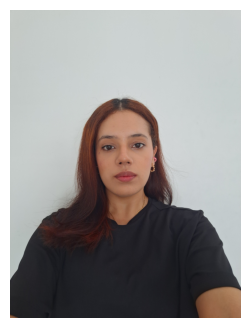

Running on device: cpu
Bounding boxes: [[1104.2896728515625 1329.6099853515625 1872.2679443359375
  2391.98388671875]]
Probability: [0.9999852180480957]
Landmarks: [[[1289.119873046875 1786.11474609375]
  [1655.99462890625 1759.0909423828125]
  [1483.763916015625 1945.56884765625]
  [1351.31494140625 2168.683349609375]
  [1651.102294921875 2153.4091796875]]]


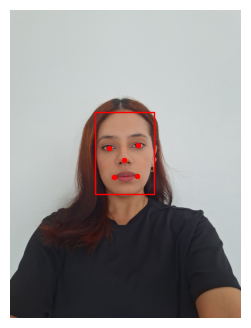

In [3]:
import gdown
from PIL import Image
import torch
from facenet_pytorch import MTCNN
import matplotlib.pyplot as plt

# URL de descarga directa del archivo
url = 'https://drive.google.com/uc?id=1TrMm5Dun_bQATAp23wqsBB6Xx48wSXkr'

# Nombre del archivo para guardar la imagen descargada
filename = '20240525_163225.jpg'

# Descargar la imagen usando gdown
try:
    gdown.download(url, filename, quiet=False)
    print("Descarga completada.")
except Exception as e:
    print(f"Error descargando la imagen: {e}")

# Lectura de imágenes y rotación
# ==============================================================================
try:
    imagen_1 = Image.open(filename)

    # Rotar la imagen 270 grados hacia la izquierda si es necesario
    imagen_1_rotated = imagen_1.rotate(270, expand=True)

    # Mostrar la imagen rotada
    plt.figure(figsize=(5, 4))
    plt.imshow(imagen_1_rotated)
    plt.axis('off')
    plt.show()
except Exception as e:
    print(f"Error al leer la imagen: {e}")

# Detección de bounding box y landmarks
# ==============================================================================
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

# Inicializar MTCNN
mtcnn = MTCNN(
            select_largest=True,
            min_face_size=20,
            thresholds=[0.6, 0.7, 0.7],
            post_process=False,
            image_size=160,
            device=device
        )

try:
    # Detectar caras en la imagen
    boxes, probs, landmarks = mtcnn.detect(imagen_1_rotated, landmarks=True)
    print('Bounding boxes:', boxes)
    print('Probability:', probs)
    print('Landmarks:', landmarks)

    # Representación con matplotlib
    # ==============================================================================
    if boxes is not None:
        box = boxes[0]
        landmark = landmarks[0]
        fig, ax = plt.subplots(figsize=(5, 4))
        ax.imshow(imagen_1_rotated)
        ax.scatter(landmark[:, 0], landmark[:, 1], s=8, c='red')
        rect = plt.Rectangle(
            xy=(box[0], box[1]),
            width=box[2] - box[0],
            height=box[3] - box[1],
            fill=False,
            color='red'
        )
        ax.add_patch(rect)
        ax.axis('off')
        plt.show()
except Exception as e:
    print(f"Error durante la detección de rostros: {e}")

In [4]:
# Detección de cara
# ==============================================================================
face = mtcnn.forward(imagen_1_rotated)

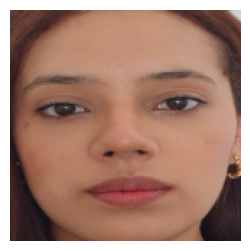

In [5]:
# Representación con matplotlib
# ==============================================================================
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
face = face.permute(1, 2, 0).int().numpy()
ax.imshow(face)
plt.axis('off');

**Embbending de cara**

In [6]:
# Modelo para hacer el embedding de las caras
# ==============================================================================
from facenet_pytorch import InceptionResnetV1
encoder = InceptionResnetV1(pretrained='vggface2', classify=False, device=device).eval()

  0%|          | 0.00/107M [00:00<?, ?B/s]

In [7]:
# Detección de cara
# ==============================================================================
cara = mtcnn(imagen_1_rotated)

In [8]:
# Embedding de cara
# ==============================================================================
embedding_cara = encoder.forward(cara.reshape((1,3, 160, 160))).detach().cpu()
embedding_cara

tensor([[ 0.0485, -0.0103,  0.0381,  0.0263,  0.0612, -0.0293, -0.0178, -0.0065,
         -0.0285, -0.0279, -0.0858,  0.0036, -0.0902, -0.0125,  0.0809, -0.0508,
          0.0099, -0.0208,  0.0300,  0.0226,  0.0152,  0.0352, -0.0351,  0.0147,
          0.0255,  0.0028,  0.1146,  0.0068,  0.0266, -0.0848, -0.0068,  0.0333,
          0.0297,  0.0122,  0.0468, -0.0015, -0.0799,  0.0310, -0.0353,  0.0293,
         -0.0012,  0.0198,  0.0114, -0.1174, -0.0144, -0.0492,  0.0415, -0.0054,
         -0.0574,  0.0310,  0.1002,  0.0790,  0.0714,  0.0455, -0.0027, -0.0403,
          0.0356,  0.0862, -0.0014,  0.0272, -0.0215, -0.0597,  0.0784, -0.0421,
          0.0237,  0.0395,  0.0300, -0.0109,  0.0188, -0.0530,  0.0505, -0.0487,
         -0.0222, -0.0047, -0.0221,  0.0728,  0.0886, -0.0131, -0.0124,  0.0793,
          0.0356,  0.0717, -0.0032, -0.0236,  0.0175, -0.0189,  0.0299, -0.0064,
          0.0030,  0.0934, -0.0209,  0.0489,  0.0356, -0.0695, -0.0323, -0.0077,
         -0.0774,  0.0357, -

## **Multiples caras:**

Downloading...
From: https://drive.google.com/uc?id=1cPUWMp5GKMNDl3M74cN9SQ0v9x-x0dNZ
To: /content/grupal.jpg
100%|██████████| 109k/109k [00:00<00:00, 58.3MB/s]


Descarga completada.


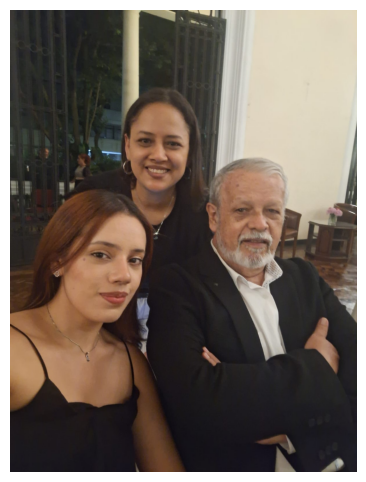

In [9]:
import gdown
from PIL import Image
import torch
from facenet_pytorch import MTCNN
import matplotlib.pyplot as plt

# URL de descarga directa del archivo
url = 'https://drive.google.com/uc?id=1cPUWMp5GKMNDl3M74cN9SQ0v9x-x0dNZ'

# Nombre del archivo para guardar la imagen descargada
filename = 'grupal.jpg'

# Descargar la imagen usando gdown
try:
    gdown.download(url, filename, quiet=False)
    print("Descarga completada.")
except Exception as e:
    print(f"Error descargando la imagen: {e}")

# Lectura de imágenes y visualización
# ==============================================================================
try:
    imagen_2 = Image.open(filename)

    # Mostrar la imagen
    plt.figure(figsize=(10, 6))
    plt.imshow(imagen_2)
    plt.axis('off')
    plt.show()
except Exception as e:
    print(f"Error al leer la imagen: {e}")


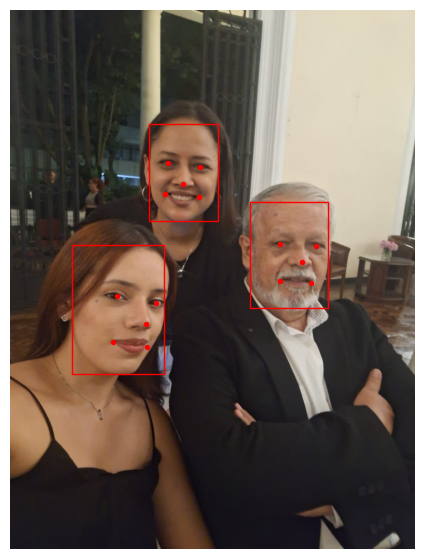

In [10]:
# Detección de bounding box y landmarks
# ==============================================================================
boxes, probs, landmarks = mtcnn.detect(imagen_2, landmarks=True)

# Representación con matplotlib
# ==============================================================================
fig, ax = plt.subplots(figsize=(12, 7))
ax.imshow(imagen_2)

for box, landmark in zip(boxes, landmarks):
    ax.scatter(landmark[:, 0], landmark[:, 1], s=8, c= 'red')
    rect = plt.Rectangle(
                xy     = (box[0], box[1]),
                width  = box[2] - box[0],
                height = box[3] - box[1],
                fill   = False,
                color  = 'red'
           )
    ax.add_patch(rect)

ax.axis('off');

**Extracción de caras**

In [11]:
# Detector MTCNN
# ==============================================================================
mtcnn = MTCNN(
            keep_all      = True,
            min_face_size = 20,
            thresholds    = [0.6, 0.7, 0.7],
            post_process  = False,
            image_size    = 160,
            device        = device
        )

# Detección de caras
# ==============================================================================
faces = mtcnn.forward(imagen_2)


In [12]:
faces.shape

torch.Size([3, 3, 160, 160])

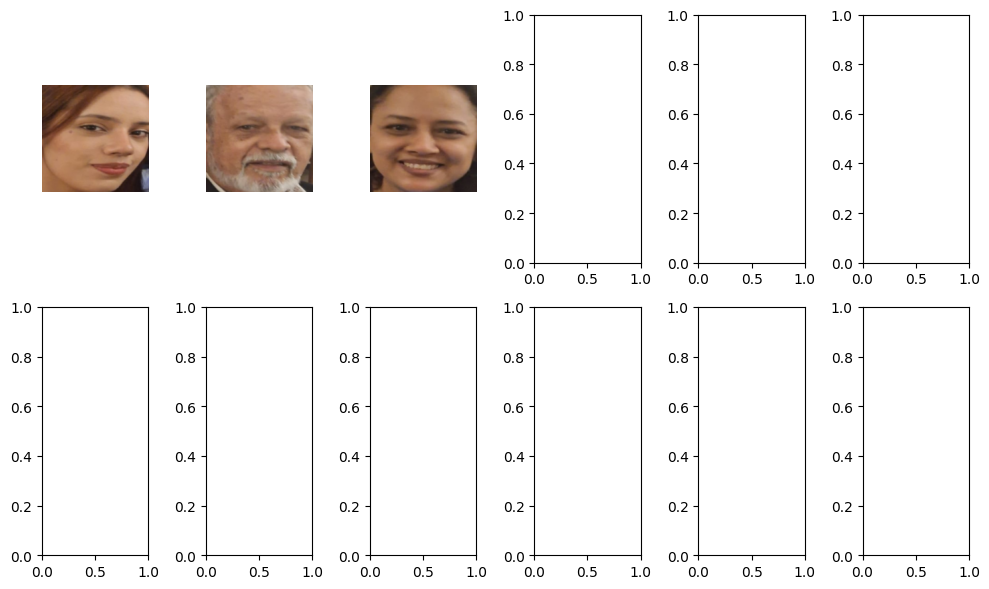

In [13]:
# Representación con matplotlib
# ==============================================================================
fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(10, 6))
axs= axs.flatten()

for i in range(faces.shape[0]):
    face = faces[i,:,:,:].permute(1, 2, 0).int().numpy()
    axs[i].imshow(face)
    axs[i].axis('off')

plt.tight_layout();

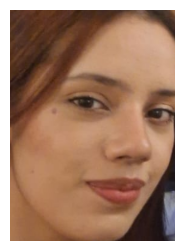

In [30]:
# Extracción de cara a partir de una bounding box
# ==============================================================================
boxes, probs, landmarks = mtcnn.detect(imagen_2, landmarks=True)
x1, y1, x2, y2 = boxes[0].astype(int)
recorte_cara = np.array(imagen_2)[y1:y2, x1:x2]

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
plt.imshow(recorte_cara)
plt.axis('off');

## **Similitud entre caras:**

In [21]:
# Detector MTCNN
# ==============================================================================
mtcnn = MTCNN(
            keep_all      = True,
            min_face_size = 20,
            thresholds    = [0.6, 0.7, 0.7],
            post_process  = False,
            image_size    = 160,
            device        = device
        )

In [22]:
# Extracción de las caras MTCNN
# ==============================================================================
sofia_1 = mtcnn(imagen_1_rotated)[0]
sofia_2 = mtcnn(imagen_2)[0]
martin = mtcnn(imagen_2)[1]

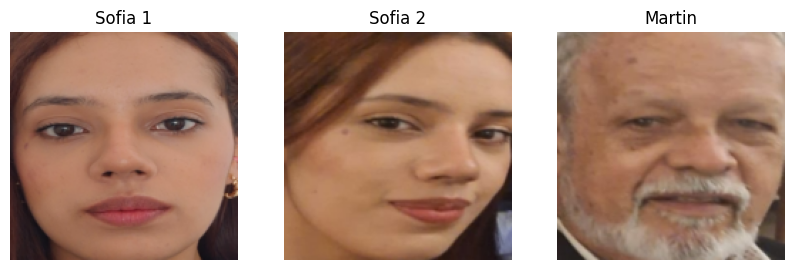

In [23]:
# Representación con matplotlib
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))

face = sofia_1.permute(1, 2, 0).int().numpy()
axs[0].imshow(face)
axs[0].set_title('Sofia 1')
axs[0].axis('off')

face = sofia_2.permute(1, 2, 0).int().numpy()
axs[1].imshow(face)
axs[1].set_title('Sofia 2')
axs[1].axis('off')

face = martin.permute(1, 2, 0).int().numpy()
axs[2].imshow(face)
axs[2].set_title('Martin')
axs[2].axis('off');

In [24]:
# Embeddings
# ==============================================================================
embeding_sofia_1 = encoder.forward(sofia_1.reshape((1,3, 160, 160))).detach().cpu()
embeding_sofia_2 = encoder.forward(sofia_2.reshape((1,3, 160, 160))).detach().cpu()
embeding_martin = encoder.forward(martin.reshape((1,3, 160, 160))).detach().cpu()

In [35]:
# Importar bibliotecas necesarias
from scipy.spatial.distance import euclidean
import numpy as np

# Calcular la distancia euclidiana entre embeddings de caras
# ==============================================================================
# Suponiendo que embeding_sofia_1, embeding_sofia_2, embeding_cameron son embeddings de caras

# Convertir embeddings de caras a vectores 1-D
vector_sofia_1 = embeding_sofia_1.flatten()
vector_sofia_2 = embeding_sofia_2.flatten()
vector_martin = embeding_martin.flatten()

# Calcular distancias euclidianas
distancia_sofia_misma_imagen = euclidean(vector_sofia_1, vector_sofia_1)
distancia_sofia_imagenes_diferentes = euclidean(vector_sofia_1, vector_sofia_2)
distancia_sofia_martin = euclidean(vector_sofia_1, vector_martin)

# Imprimir resultados
print(f"Distancia entre la misma imagen sofia: {distancia_sofia_misma_imagen}")
print(f"Distancia entre las dos imágenes de sofia: {distancia_sofia_imagenes_diferentes}")
print(f"Distancia entre sofia y martin: {distancia_sofia_martin}")


Distancia entre la misma imagen sofia: 0.0
Distancia entre las dos imágenes de sofia: 0.27372682094573975
Distancia entre sofia y martin: 0.24216674268245697


In [27]:
################################################################################
#                            RECONOCIMIENTO FACIAL                             #
#                                                                              #
################################################################################
# coding=utf-8


# Librerías
# ==============================================================================
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
import warnings
import typing
import logging
import os
import platform
import glob
import PIL
import facenet_pytorch
from typing import Union, Dict
from PIL import Image
from facenet_pytorch import MTCNN
from facenet_pytorch import InceptionResnetV1
from urllib.request import urlretrieve
from tqdm import tqdm
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cosine

warnings.filterwarnings('ignore')

logging.basicConfig(
    format = '%(asctime)-5s %(name)-10s %(levelname)-5s %(message)s',
    level  = logging.WARNING,
)


# Funciones para la detección, extracción, embedding, identificación y gráficos
# ==============================================================================
def detectar_caras(imagen: Union[PIL.Image.Image, np.ndarray],
                   detector: facenet_pytorch.models.mtcnn.MTCNN=None,
                   keep_all: bool        = True,
                   min_face_size: int    = 20,
                   thresholds: list      = [0.6, 0.7, 0.7],
                   device: str           = None,
                   min_confidence: float = 0.5,
                   fix_bbox: bool        = True,
                   verbose               = False)-> np.ndarray:


    # Comprobaciones iniciales
    # --------------------------------------------------------------------------
    if not isinstance(imagen, (np.ndarray, PIL.Image.Image)):
        raise Exception(
            f"`imagen` debe ser `np.ndarray, PIL.Image`. Recibido {type(imagen)}."
        )

    if detector is None:
        logging.info('Iniciando detector MTCC')
        detector = MTCNN(
                        keep_all      = keep_all,
                        min_face_size = min_face_size,
                        thresholds    = thresholds,
                        post_process  = False,
                        device        = device
                   )

    # Detección de caras
    # --------------------------------------------------------------------------
    if isinstance(imagen, PIL.Image.Image):
        imagen = np.array(imagen).astype(np.float32)

    bboxes, probs = detector.detect(imagen, landmarks=False)

    if bboxes is None:
        bboxes = np.array([])
        probs  = np.array([])
    else:
        # Se descartan caras con una probabilidad estimada inferior a `min_confidence`.
        bboxes = bboxes[probs > min_confidence]
        probs  = probs[probs > min_confidence]

    logging.info(f'Número total de caras detectadas: {len(bboxes)}')
    logging.info(f'Número final de caras seleccionadas: {len(bboxes)}')

    # Corregir bounding boxes
    #---------------------------------------------------------------------------
    # Si alguna de las esquinas de la bounding box está fuera de la imagen, se
    # corrigen para que no sobrepase los márgenes.
    if len(bboxes) > 0 and fix_bbox:
        for i, bbox in enumerate(bboxes):
            if bbox[0] < 0:
                bboxes[i][0] = 0
            if bbox[1] < 0:
                bboxes[i][1] = 0
            if bbox[2] > imagen.shape[1]:
                bboxes[i][2] = imagen.shape[1]
            if bbox[3] > imagen.shape[0]:
                bboxes[i][3] = imagen.shape[0]

    # Información de proceso
    # ----------------------------------------------------------------------
    if verbose:
        print("----------------")
        print("Imagen escaneada")
        print("----------------")
        print(f"Caras detectadas: {len(bboxes)}")
        print(f"Correción bounding boxes: {ix_bbox}")
        print(f"Coordenadas bounding boxes: {bboxes}")
        print(f"Confianza bounding boxes:{probs} ")
        print("")

    return bboxes.astype(int)


def mostrar_bboxes(imagen: Union[PIL.Image.Image, np.ndarray],
                   bboxes: np.ndarray,
                   identidades: list=None,
                   ax=None ) -> None:

    # Comprobaciones iniciales
    # --------------------------------------------------------------------------
    if not isinstance(imagen, (np.ndarray, PIL.Image.Image)):
        raise Exception(
            f"`imagen` debe ser `np.ndarray, PIL.Image`. Recibido {type(imagen)}."
        )

    if identidades is not None:
        if len(bboxes) != len(identidades):
            raise Exception(
                '`identidades` debe tener el mismo número de elementos que `bboxes`.'
            )
    else:
        identidades = [None] * len(bboxes)

    # Mostrar la imagen y superponer bounding boxes
    # --------------------------------------------------------------------------
    if ax is None:
        ax = plt.gca()

    if isinstance(imagen, PIL.Image.Image):
        imagen = np.array(imagen).astype(np.float32) / 255

    ax.imshow(imagen)
    ax.axis('off')

    if len(bboxes) > 0:

        for i, bbox in enumerate(bboxes):
            if identidades[i] is not None:
                rect = plt.Rectangle(
                            xy        = (bbox[0], bbox[1]),
                            width     = bbox[2] - bbox[0],
                            height    = bbox[3] - bbox[1],
                            linewidth = 1,
                            edgecolor = 'lime',
                            facecolor = 'none'
                        )

                ax.add_patch(rect)

                ax.text(
                    x = bbox[0],
                    y = bbox[1] -10,
                    s = identidades[i],
                    fontsize = 10,
                    color    = 'lime'
                )
            else:
                rect = plt.Rectangle(
                            xy        = (bbox[0], bbox[1]),
                            width     = bbox[2] - bbox[0],
                            height    = bbox[3] - bbox[1],
                            linewidth = 1,
                            edgecolor = 'red',
                            facecolor = 'none'
                        )

                ax.add_patch(rect)

        plt.show()


def mostrar_bboxes_cv2(imagen: Union[PIL.Image.Image, np.ndarray],
                       bboxes: np.ndarray,
                       identidades: list=None,
                       device: str='window') -> None:

    # Comprobaciones iniciales
    # --------------------------------------------------------------------------
    if not isinstance(imagen, (np.ndarray, PIL.Image.Image)):
        raise Exception(
            f"`imagen` debe ser `np.ndarray`, `PIL.Image`. Recibido {type(imagen)}."
        )

    if identidades is not None:
        if len(bboxes) != len(identidades):
            raise Exception(
                '`identidades` debe tener el mismo número de elementos que `bboxes`.'
            )
    else:
        identidades = [None] * len(bboxes)

    # Mostrar la imagen y superponer bounding boxes
    # --------------------------------------------------------------------------
    if isinstance(imagen, PIL.Image.Image):
        imagen = np.array(imagen).astype(np.float32) / 255

    if len(bboxes) > 0:

        for i, bbox in enumerate(bboxes):

            if identidades[i] is not None:
                cv2.rectangle(
                    img       = imagen,
                    pt1       = (bbox[0], bbox[1]),
                    pt2       = (bbox[2], bbox[3]),
                    color     = (0, 255, 0),
                    thickness = 2
                )

                cv2.putText(
                    img       = imagen,
                    text      = identidades[i],
                    org       = (bbox[0], bbox[1]-10),
                    fontFace  = cv2.FONT_HERSHEY_SIMPLEX,
                    fontScale = 1e-3 * imagen.shape[0],
                    color     = (0,255,0),
                    thickness = 2
                )
            else:
                cv2.rectangle(
                    img       = imagen,
                    pt1       = (bbox[0], bbox[1]),
                    pt2       = (bbox[2], bbox[3]),
                    color     = (255, 0, 0),
                    thickness = 2
                )

    if device is None:
        return imagen
    else:
        cv2.imshow(device, cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
        if cv2.waitKey(1) == 27:
            brcv2.destroyAllWindows()  # esc para cerrar la ventana


def extraer_caras(imagen: Union[PIL.Image.Image, np.ndarray],
                  bboxes: np.ndarray,
                  output_img_size: Union[list, tuple, np.ndarray]=[160, 160]) -> None:




    # Comprobaciones iniciales
    # --------------------------------------------------------------------------
    if not isinstance(imagen, (np.ndarray, PIL.Image.Image)):
        raise Exception(
            f"`imagen` debe ser np.ndarray, PIL.Image. Recibido {type(imagen)}."
        )

    # Recorte de cara
    # --------------------------------------------------------------------------
    if isinstance(imagen, PIL.Image.Image):
        imagen = np.array(imagen)

    if len(bboxes) > 0:
        caras = []
        for bbox in bboxes:
            x1, y1, x2, y2 = bbox
            cara = imagen[y1:y2, x1:x2]
            # Redimensionamiento del recorte
            cara = Image.fromarray(cara)
            cara = cara.resize(tuple(output_img_size))
            cara = np.array(cara)
            caras.append(cara)

    caras = np.stack(caras, axis=0)

    return caras


def calcular_embeddings(img_caras: np.ndarray, encoder=None,
                        device: str=None) -> np.ndarray:


    # Comprobaciones iniciales
    # --------------------------------------------------------------------------
    if not isinstance(img_caras, np.ndarray):
        raise Exception(
            f"`img_caras` debe ser np.ndarray {type(img_caras)}."
        )

    if img_caras.ndim != 4:
        raise Exception(
            f"`img_caras` debe ser np.ndarray con dimensiones [nº caras, ancho, alto, 3]."
            f" Recibido {img_caras.ndim}."
        )

    if encoder is None:
        logging.info('Iniciando encoder InceptionResnetV1')
        encoder = InceptionResnetV1(
                        pretrained = 'vggface2',
                        classify   = False,
                        device     = device
                   ).eval()

    # Calculo de embedings
    # --------------------------------------------------------------------------
    # El InceptionResnetV1 modelo requiere que las dimensiones de entrada sean
    # [nº caras, 3, ancho, alto]
    caras = np.moveaxis(img_caras, -1, 1)
    caras = caras.astype(np.float32) / 255
    caras = torch.tensor(caras)
    embeddings = encoder.forward(caras).detach().cpu().numpy()
    embeddings = embeddings
    return embeddings


def identificar_caras(embeddings: np.ndarray,
                      dic_referencia: dict,
                      threshold_similaridad: float = 0.6) -> list:


    identidades = []

    for i in range(embeddings.shape[0]):
        # Se calcula la similitud con cada uno de los perfiles de referencia.
        similitudes = {}
        for key, value in dic_referencia.items():
            similitudes[key] = 1 - cosine(embeddings[i], value)

        # Se identifica la persona de mayor similitud.
        identidad = max(similitudes, key=similitudes.get)
        # Si la similitud < threshold_similaridad, se etiqueta como None
        if similitudes[identidad] < threshold_similaridad:
            identidad = None

        identidades.append(identidad)

    return identidades


def crear_diccionario_referencias(folder_path:str,
                                  dic_referencia:dict=None,
                                  detector: facenet_pytorch.models.mtcnn.MTCNN=None,
                                  min_face_size: int=40,
                                  thresholds: list=[0.6, 0.7, 0.7],
                                  min_confidence: float=0.9,
                                  encoder=None,
                                  device: str=None,
                                  verbose: bool=False)-> dict:


    # Comprobaciones iniciales
    # --------------------------------------------------------------------------
    if not os.path.isdir(folder_path):
        raise Exception(
            f"Directorio {folder_path} no existe."
        )

    if len(os.listdir(folder_path) ) == 0:
        raise Exception(
            f"Directorio {folder_path} está vacío."
        )


    if detector is None:
        logging.info('Iniciando detector MTCC')
        detector = MTCNN(
                        keep_all      = False,
                        post_process  = False,
                        min_face_size = min_face_size,
                        thresholds    = thresholds,
                        device        = device
                   )

    if encoder is None:
        logging.info('Iniciando encoder InceptionResnetV1')
        encoder = InceptionResnetV1(
                        pretrained = 'vggface2',
                        classify   = False,
                        device     = device
                   ).eval()


    new_dic_referencia = {}
    folders = glob.glob(folder_path + "/*")

    for folder in folders:

        if platform.system() in ['Linux', 'Darwin']:
            identidad = folder.split("/")[-1]
        else:
            identidad = folder.split("\\")[-1]

        logging.info(f'Obteniendo embeddings de: {identidad}')
        embeddings = []
        # Se lista todas las imagenes .jpg .jpeg .tif .png
        path_imagenes = glob.glob(folder + "/*.jpg")
        path_imagenes.extend(glob.glob(folder + "/*.jpeg"))
        path_imagenes.extend(glob.glob(folder + "/*.tif"))
        path_imagenes.extend(glob.glob(folder + "/*.png"))
        logging.info(f'Total imagenes referencia: {len(path_imagenes)}')

        for path_imagen in path_imagenes:
            logging.info(f'Leyendo imagen: {path_imagen}')
            imagen = Image.open(path_imagen)
            # Si la imagen es RGBA se pasa a RGB
            if np.array(imagen).shape[2] == 4:
                imagen  = np.array(imagen)[:, :, :3]
                imagen  = Image.fromarray(imagen)

            bbox = detectar_caras(
                        imagen,
                        detector       = detector,
                        min_confidence = min_confidence,
                        verbose        = False
                    )

            if len(bbox) > 1:
                logging.warning(
                    f'Más de 2 caras detectadas en la imagen: {path_imagen}. '
                    f'Se descarta la imagen del diccionario de referencia.'
                )
                continue

            if len(bbox) == 0:
                logging.warning(
                    f'No se han detectado caras en la imagen: {path_imagen}.'
                )
                continue

            cara = extraer_caras(imagen, bbox)
            embedding = calcular_embeddings(cara, encoder=encoder)
            embeddings.append(embedding)

        if verbose:
            print(f"Identidad: {identidad} --- Imágenes referencia: {len(embeddings)}")

        embedding_promedio = np.array(embeddings).mean(axis = 0)
        new_dic_referencia[identidad] = embedding_promedio

    if dic_referencia is not None:
        dic_referencia.update(new_dic_referencia)
        return dic_referencia
    else:
        return new_dic_referencia


def pipeline_deteccion_imagen(imagen: Union[PIL.Image.Image, np.ndarray],
                              dic_referencia:dict,
                              detector: facenet_pytorch.models.mtcnn.MTCNN=None,
                              keep_all: bool=True,
                              min_face_size: int=20,
                              thresholds: list=[0.6, 0.7, 0.7],
                              device: str=None,
                              min_confidence: float=0.5,
                              fix_bbox: bool=True,
                              output_img_size: Union[list, tuple, np.ndarray]=[160, 160],
                              encoder=None,
                              threshold_similaridad: float=0.5,
                              ax=None,
                              verbose=False)-> None:



    bboxes = detectar_caras(
                imagen         = imagen,
                detector       = detector,
                keep_all       = keep_all,
                min_face_size  = min_face_size,
                thresholds     = thresholds,
                device         = device,
                min_confidence = min_confidence,
                fix_bbox       = fix_bbox
              )

    if len(bboxes) == 0:

        logging.info('No se han detectado caras en la imagen.')
        mostrar_bboxes(
            imagen      = imagen,
            bboxes      = bboxes,
            ax          = ax
        )

    else:

        caras = extraer_caras(
                    imagen = imagen,
                    bboxes = bboxes
                )

        embeddings = calcular_embeddings(
                        img_caras = caras,
                        encoder   = encoder
                     )

        identidades = identificar_caras(
                         embeddings     = embeddings,
                         dic_referencia = dic_referencias,
                         threshold_similaridad = threshold_similaridad
                       )

        mostrar_bboxes(
            imagen      = imagen,
            bboxes      = bboxes,
            identidades = identidades,
            ax          = ax
        )


### **Creación del diccionario de referencias**


In [36]:
import gdown
import os

# URL base del enlace de Google Drive
base_url = 'https://drive.google.com/drive/folder/suc?id='

# IDs de las carpetas en Google Drive
folder_ids = {
    'SofiaHiguera': '1VXKB-mUJiHeUJlCfUsK1gTmCwReJBrIF',
    'Alba': '1VXKB-mUJiHeUJlCfUsK1gTmCwReJBrIF',
    'Martin': '1VXKB-mUJiHeUJlCfUsK1gTmCwReJBrIF',
    'Sofia': '1VXKB-mUJiHeUJlCfUsK1gTmCwReJBrIF'
}

# Directorio de destino para guardar las imágenes
destination_dir = './images/'

# Descargar las imágenes de cada carpeta
for folder, folder_id in folder_ids.items():
    # URL de descarga directa de la carpeta
    url = base_url + folder_id

    # Crear el directorio si no existe
    os.makedirs(os.path.join(destination_dir, folder), exist_ok=True)

    # Descargar los archivos de la carpeta
    try:
        gdown.download(url, os.path.join(destination_dir, folder), quiet=False)
        print(f"Descarga de archivos de {folder} completada.")
    except Exception as e:
        print(f"Error descargando archivos de {folder}: {e}")



Downloading...
From: https://drive.google.com/drive/folder/suc?id=1VXKB-mUJiHeUJlCfUsK1gTmCwReJBrIF
To: /content/images/SofiaHiguera
1.64kB [00:00, 1.79MB/s]
Downloading...
From: https://drive.google.com/drive/folder/suc?id=1VXKB-mUJiHeUJlCfUsK1gTmCwReJBrIF
To: /content/images/Alba


Descarga de archivos de SofiaHiguera completada.


1.64kB [00:00, 2.84MB/s]


Descarga de archivos de Alba completada.


Downloading...
From: https://drive.google.com/drive/folder/suc?id=1VXKB-mUJiHeUJlCfUsK1gTmCwReJBrIF
To: /content/images/Martin
1.64kB [00:00, 2.42MB/s]


Descarga de archivos de Martin completada.


Downloading...
From: https://drive.google.com/drive/folder/suc?id=1VXKB-mUJiHeUJlCfUsK1gTmCwReJBrIF
To: /content/images/Sofia
1.64kB [00:00, 3.12MB/s]

Descarga de archivos de Sofia completada.


In [37]:
import torch
from facenet_pytorch import MTCNN
import os

# Detectar si se dispone de GPU cuda
# ==============================================================================
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f'Running on device: {device}')

# Directorio que contiene las imágenes descargadas
folder_path = './images/'

# Crear el detector MTCNN
# ==============================================================================
mtcnn = MTCNN(
    select_largest=True,
    min_face_size=40,
    thresholds=[0.9, 0.9, 0.9],
    device=device
)

# Crear diccionario de referencia para cada persona
# ==============================================================================
dic_referencias = {}
for folder_name in os.listdir(folder_path):
    if os.path.isdir(os.path.join(folder_path, folder_name)):
        folder_images = []
        folder_dir = os.path.join(folder_path, folder_name)
        for filename in os.listdir(folder_dir):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(folder_dir, filename)
                folder_images.append(image_path)

        references = []
        for image_path in folder_images:
            image = Image.open(image_path).convert('RGB')
            boxes, probs, landmarks = mtcnn.detect(image)
            if boxes is not None:
                references.append((image_path, landmarks[0]))

        dic_referencias[folder_name] = references

print('Diccionario de referencia creado con éxito.')


Running on device: cpu
Diccionario de referencia creado con éxito.


In [38]:
def calcular_embeddings(img_caras: np.ndarray, encoder=None,
                        device: str=None) -> np.ndarray:

    if encoder is None:
        logging.info('Iniciando encoder InceptionResnetV1')
        encoder = InceptionResnetV1(
                        pretrained = 'vggface2',
                        classify   = False,
                        device     = device
                   ).eval()

    # Calculo de embedings
    # --------------------------------------------------------------------------
    # El InceptionResnetV1 modelo requiere que las dimensiones de entrada sean
    # [nº caras, 3, ancho, alto]
    caras = np.moveaxis(img_caras, -1, 1)
    caras = caras.astype(np.float32) / 255
    caras = torch.tensor(caras)
    embeddings = encoder.forward(caras).detach().cpu().numpy()
    logging.info(f'Embeddings calculados: {embeddings.shape}')  # Añadido para depuración
    return embeddings


def identificar_caras(embeddings: np.ndarray,
                      dic_referencia: dict,
                      threshold_similaridad: float = 0.6) -> list:

    identidades = []

    for i in range(embeddings.shape[0]):
        # Se calcula la similitud con cada uno de los perfiles de referencia.
        similitudes = {}
        for key, value in dic_referencia.items():
            similitudes[key] = 1 - cosine(embeddings[i], value)

        # Se identifica la persona de mayor similitud.
        identidad = max(similitudes, key=similitudes.get)
        # Si la similitud < threshold_similaridad, se etiqueta como None
        if similitudes[identidad] < threshold_similaridad:
            identidad = None

        identidades.append(identidad)

    return identidades


Running on device: cpu


FileNotFoundError: [Errno 2] No such file or directory: 'imagen_2.jpg'

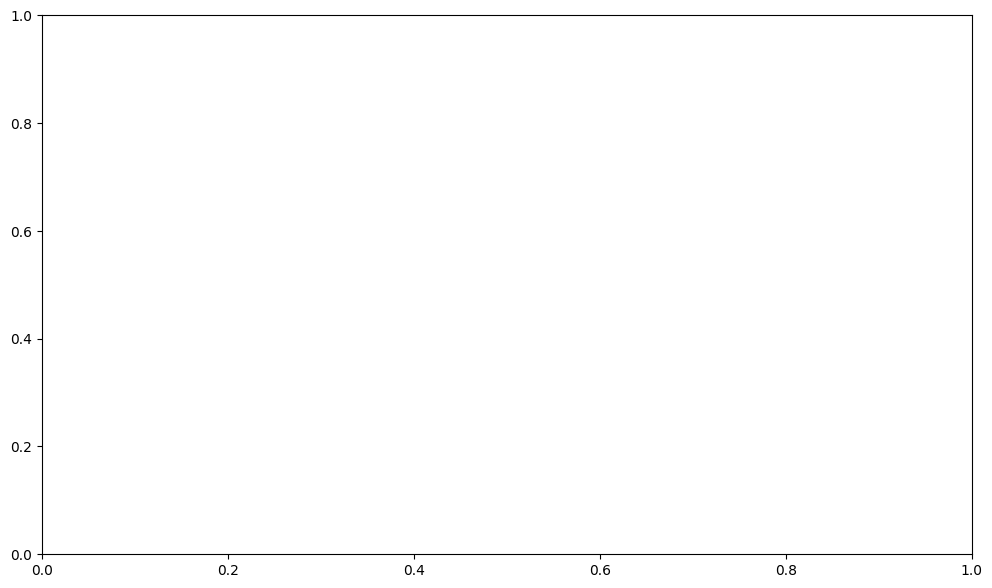

In [42]:
# Reconocimiento en imágenes
# ==============================================================================
# Detectar si se dispone de GPU cuda
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(F'Running on device: {device}')

# Identificar las personas en la imagen
fig, ax = plt.subplots(figsize=(12, 7))
imagen = Image.open('imagen_2.jpg')

pipeline_deteccion_imagen(
    imagen = imagen,
    dic_referencia        = dic_referencias,
    min_face_size         = 20,
    thresholds            = [0.6, 0.7, 0.7],
    min_confidence        = 0.5,
    threshold_similaridad = 0.6,
    device                = device,
    ax                    = ax,
    verbose               = False
)